In [11]:
import lettuce as lt
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import csv
from argparse import ArgumentParser, ArgumentDefaultsHelpFormatter

In [12]:
parser = ArgumentParser(formatter_class=ArgumentDefaultsHelpFormatter)
parser.add_argument("--vtkdir", type=str, help="name base of vtk files - they are usually in a vtk-subdirectory!", default="./output/")
parser.add_argument("--csvdir", type=str, default="./output/")
parser.add_argument("--resolution", type=int, default=40)
parser.add_argument("--nout", type=int, default=100)
parser.add_argument("--nvtk", type=int, default=200)
parser.add_argument("--tmax", type=int, default=20)
parser.add_argument("--Re", type=int, default=800)
parser.add_argument("--collision_operator", type=str, default="BGK")
parser.add_argument("--Precision", type=str, default="Single")
parser.add_argument("--Mach", type=float, default=0.05)
args, unknown = parser.parse_known_args()
args = vars(args)
print("ICH FUNKTIONIERE MIT PULLEN")
Re=args["Re"]
basedir = args["vtkdir"]
csvdir = args["csvdir"]
res = args["resolution"]
nout = args["nout"]
nvtk = args["nvtk"]
tmax = args["tmax"]
Precision= args["Precision"]
collision_operator = args["collision_operator"]
Mach = args["Mach"]
print(collision_operator)
print(torch.version.cuda)

ICH FUNKTIONIERE MIT PULLEN
BGK
12.1
ICH FUNKTIONIERE MIT PULLEN
BGK
12.1


In [13]:
print(Precision)
lattice = lt.Lattice(lt.D3Q27, device = "cpu", dtype=torch.float32 if Precision == "Single" else torch.float64)
flow = lt.TaylorGreenVortex3D(resolution=res, reynolds_number=Re, mach_number=Mach, lattice=lattice)
print(flow.units.convert_time_to_lu(tmax))
tensor=torch.tensor(1)
print(tensor.dtype)
# Konstruktion des Funktionsnamens
function_name = f"{collision_operator}Collision"

# Überprüfung, ob die Funktion existiert, und deren Aufruf
#if hasattr(lt, function_name):
#    collision = getattr(lt, function_name)(lattice, tau=flow.units.relaxation_parameter_lu)
#    print(collision_operator)
#else:
#    print(":(((")
#    raise ValueError(f"Collision type {collision_operator} is not supported.")
if collision_operator == "BGK":
    collision=lt.BGKCollision(lattice, tau=flow.units.relaxation_parameter_lu)
elif collision_operator == "KBC":
    collision=lt.KBCCollision3D(lattice, tau=flow.units.relaxation_parameter_lu)
#collision = lt.BGKCollision(lattice, tau=flow.units.relaxation_parameter_lu)
#collision=collision_type(lattice, tau=flow.units.relaxation_parameter_lu)
print(flow.units.relaxation_parameter_lu)
streaming = lt.StandardStreaming(lattice)
simulation = lt.Simulation(flow=flow, lattice=lattice, collision=collision, streaming=streaming)


Single
4410.631163374336
torch.int64
0.5006891611192772
torch.float32
torch.float32
Single
4410.631163374336
torch.int64
0.5006891611192772
torch.float32
torch.float32


In [14]:
interval_vtk=int((flow.units.convert_time_to_lu(tmax))/20)
interval_out=int((flow.units.convert_time_to_lu(tmax))/200)
Energy = lt.IncompressibleKineticEnergy(lattice, flow)
Dissipation_TGV=lt.Dissipation_sij(lattice, flow)
Enstrophy=lt.Enstrophy(lattice, flow)
Energyspectrum= lt.EnergySpectrum(lattice, flow)
Symmetrie= lt.SymmetryReporter(lattice, flow)

reporter = lt.ObservableReporter(Energy, interval=interval_out, out=None)
reporter2 = lt.ObservableReporter(Dissipation_TGV,interval = interval_out, out=None)
reporter3= lt.ObservableReporter(Enstrophy, interval=interval_out, out=None)
reporter4=lt.ObservableReporter(Energyspectrum, interval=interval_out, out=None)
reporter5 = lt.ObservableReporter(Symmetrie, interval=interval_out, out=None)
simulation.reporters.append(reporter)
simulation.reporters.append(reporter2)
simulation.reporters.append(reporter3)
simulation.reporters.append(reporter4)
simulation.reporters.append(reporter5)
simulation.reporters.append(lt.VTKReporter(lattice, flow, interval=interval_vtk, filename_base=basedir+"out"))

steps = int(flow.units.convert_time_to_lu(tmax))
print(steps)
#simulation.reporters.append(lt.VTKReporter(lattice, flow, interval=interval_vtk, filename_base=basedir+"out"))

steps     time     IncompressibleKineticEnergy
steps     time     Dissipation_sij
steps     time     Enstrophy
steps     time     EnergySpectrum
steps     time     SymmetryReporter
4410


/home/ben/anaconda3/envs/lettuce/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1695392035891/work/aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


steps     time     IncompressibleKineticEnergy
steps     time     Dissipation_sij
steps     time     Enstrophy
steps     time     EnergySpectrum
steps     time     SymmetryReporter
4410


In [15]:
simulation.initialize_f_neq()
steps = int(flow.units.convert_time_to_lu(tmax))
mlups = simulation.step(num_steps=steps)
print("Performance in MLUPS:", mlups)
print(steps)

torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.

In [16]:
energy = np.array(simulation.reporters[0].out)
dissipation = np.array(simulation.reporters[1].out)
enstrophy=np.array(simulation.reporters[2].out)
energy_spectrum= np.array(simulation.reporters[3].out)
sym = np.array(simulation.reporters[4].out)


dEdt=np.zeros(len(energy[:,2]))
dt=energy[1,1]-energy[0,1]
nmax=len(energy[:,2])
for i in range(len(energy[:,2])):
    if i == 0:
        dEdt[i] = (energy[1,2] - energy[0,2]) / dt
    elif i == 1:
        dEdt[i] = (energy[2,2] - energy[0,2]) / 2/dt
    elif i == 2:
        dEdt[i] = (1/12*energy[0,2] - 2/3*energy[1,2] + 2/3*energy[3,2] - 1/12*energy[4,2]) / dt
    elif i >= (nmax-3):
        if i == (nmax-3):
            dEdt[i] = (1/12*energy[nmax-5,2] - 2/3*energy[nmax-4,2] + 2/3*energy[nmax-2,2] - 1/12*energy[nmax-1,2]) / dt
        elif i == (nmax-2):
            dEdt[i] = (energy[nmax-1,2] - energy[nmax-3,2]) /2/ dt
        elif i == (nmax-1):
            dEdt[i] = (energy[nmax-1,2] - energy[nmax-2,2]) /dt
    elif i < (nmax-3):
        dEdt[i] = (-1/60*energy[i-3,2] + 3/20*energy[i-2,2] - 3/4*energy[i-1,2] + 3/4*energy[i+1,2] - 3/20*energy[i+2,2] + 1/60*energy[i+3,2]) / dt
dissipationEkin=np.array([energy[:,1],-dEdt/(np.pi*2)**3])
dissipationEns=np.array([enstrophy[:,1],flow.units.viscosity_pu/(np.pi*2)**3*enstrophy[:,2]])
dissipationSij=np.array([dissipation[:,1],dissipation[:,2]])

with open(csvdir + 'DissipationEkin.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(dissipationEkin)
with open(csvdir + 'DissipationEnstrophy.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(dissipationEns)
with open(csvdir + 'DissipationSij.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(dissipationSij)
with open(csvdir + 'EnergySpectrum.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(energy_spectrum)
with open(csvdir + 'Symmetrie.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(sym)


[31.0062809  30.9829998  30.95955276 30.93520737 30.91102409 30.88659096
 30.86081123 30.83567619 30.80949593 30.78212166 30.75537872 30.72669601
 30.69740868 30.66808128 30.63638496 30.6045723  30.57165337 30.53647041
 30.50118637 30.46377182 30.42453384 30.38466644 30.3420372  30.29800415
 30.25247383 30.20400429 30.15424347 30.10209465 30.04717064 29.99068069
 29.93115044 29.86906815 29.80477524 29.7369442  29.66644096 29.59277153
 29.51508522 29.43411636 29.3488121  29.25884438 29.16436577 29.06405067
 28.95775604 28.84495926 28.72449303 28.59654236 28.46071434 28.31695557
 28.16622353 28.00870132 27.84503174 27.67588997 27.50126839 27.32189941
 27.13847542 26.95152664 26.76190758 26.56940842 26.37303352 26.17117882
 25.96123886 25.74075127 25.50764847 25.26056099 24.99971962 24.72677803
 24.44513702 24.16006851 23.87763023 23.60365486 23.34237862 23.09542084
 22.86227226 22.64096832 22.42934036 22.22576714 22.02905655 21.8378334
 21.64991379 21.46212959 21.27122879 21.07514572 20.

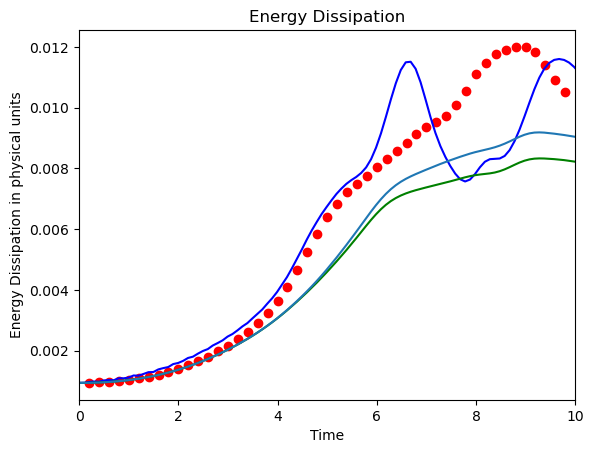

[31.0062809  30.9829998  30.95955276 30.93520737 30.91102409 30.88659096
 30.86081123 30.83567619 30.80949593 30.78212166 30.75537872 30.72669601
 30.69740868 30.66808128 30.63638496 30.6045723  30.57165337 30.53647041
 30.50118637 30.46377182 30.42453384 30.38466644 30.3420372  30.29800415
 30.25247383 30.20400429 30.15424347 30.10209465 30.04717064 29.99068069
 29.93115044 29.86906815 29.80477524 29.7369442  29.66644096 29.59277153
 29.51508522 29.43411636 29.3488121  29.25884438 29.16436577 29.06405067
 28.95775604 28.84495926 28.72449303 28.59654236 28.46071434 28.31695557
 28.16622353 28.00870132 27.84503174 27.67588997 27.50126839 27.32189941
 27.13847542 26.95152664 26.76190758 26.56940842 26.37303352 26.17117882
 25.96123886 25.74075127 25.50764847 25.26056099 24.99971962 24.72677803
 24.44513702 24.16006851 23.87763023 23.60365486 23.34237862 23.09542084
 22.86227226 22.64096832 22.42934036 22.22576714 22.02905655 21.8378334
 21.64991379 21.46212959 21.27122879 21.07514572 20.

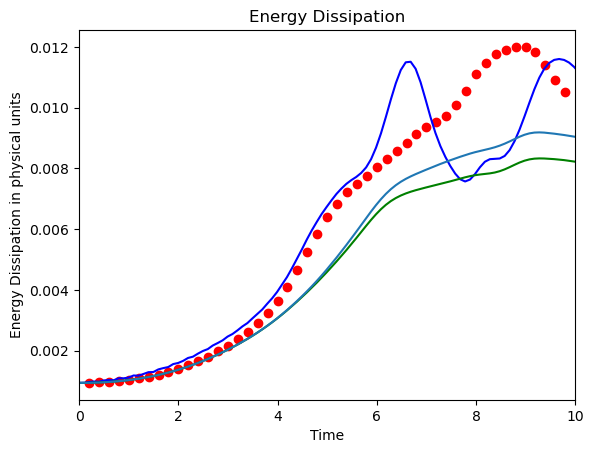

In [17]:
csv_file_path = '/home/ben/Schreibtisch/Enstropy Brachet/Brachet/Brachet_1983_tgv3d_enstrophy_Re800.csv'

# Daten aus der CSV-Datei lesen
csv_data = []
with open(csv_file_path, 'r') as file:
    csv_reader = csv.reader(file, delimiter=';')
    for row in csv_reader:
        csv_data.append(row)

csv_data = np.array(csv_data, dtype=float)
print(energy[:,2])
plt.plot(dissipationEkin[0,:],dissipationEkin[1,:],color = 'blue')
plt.plot(dissipationEns[0,:],dissipationEns[1,:], color = 'green')
plt.xlim(0,10)
plt.plot(dissipationSij[0,:],dissipationSij[1,:])
plt.scatter(csv_data[:, 0], csv_data[:, 1], color='red', label='CSV Data')
plt.title('Energy Dissipation')
#plt.plot(energy[:,1],energy[:,2])
plt.xlabel('Time')
plt.ylabel('Energy Dissipation in physical units')
plt.show()



MovieWriter imagemagick unavailable; using Pillow instead.


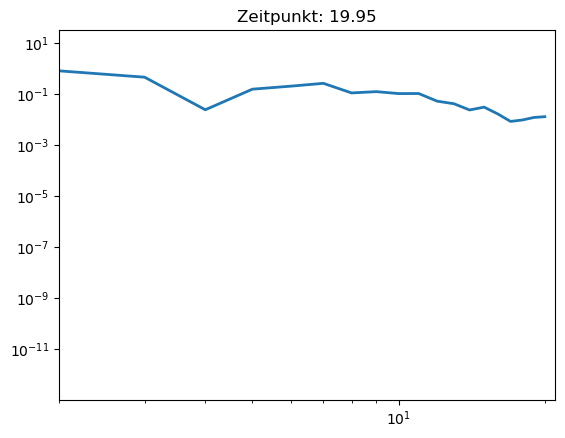

MovieWriter imagemagick unavailable; using Pillow instead.


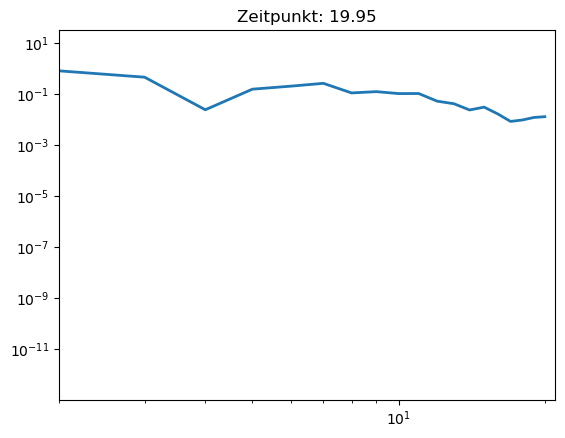

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Annahme: `energy_spectrum` und andere Variablen sind bereits definiert
energy_spectrum = np.array(simulation.reporters[3].out)

# Erstelle eine neue Figur und Achsen für die Animation
fig, ax = plt.subplots()

# Setze die Achsen auf logarithmische Skalen
ax.set_xscale('log')
ax.set_yscale('log')

# Bereich der x- und y-Achsen festlegen
ax.set_xlim(2, 21)  # Beispielbereich für Wellenlängen
ax.set_ylim(np.min(energy_spectrum[:, 4:23]), np.max(energy_spectrum[:, 4:23]))  # Bereich für das Energiespektrum

# Erstelle das Anfangsplot
line, = ax.plot([], [], lw=2)

# Initialisierungsfunktion: Zeichnet nur den Hintergrund des Plots
def init():
    line.set_data([], [])
    return (line,)

# Animationsfunktion: Diese wird in jedem Frame aufgerufen
def animate(i):
    x = np.arange(2, 21)  # Korrigierte Wellenlängen (x-Achse)
    y = energy_spectrum[i, 4:23]  # Energiespektrum für die Zeit i
    line.set_data(x, y)
    ax.set_title(f'Zeitpunkt: {energy_spectrum[i, 1]:.2f}')  # Titel mit dem Zeitpunkt
    return (line,)

# Erstelle die Animation
ani = FuncAnimation(fig, animate, init_func=init, frames=energy_spectrum.shape[0], interval=100, blit=True)

# Speichern als GIF oder MP4 (optional)
ani.save('/home/ben/Schreibtisch/energy_spectrum_animation.gif', writer='imagemagick')
# ani.save('energy_spectrum_animation.mp4', writer='ffmpeg')

plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


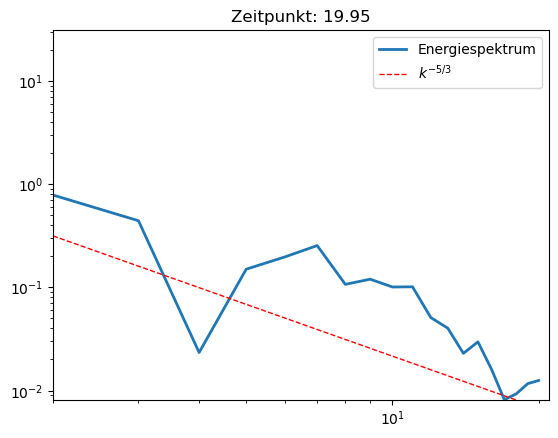

MovieWriter imagemagick unavailable; using Pillow instead.


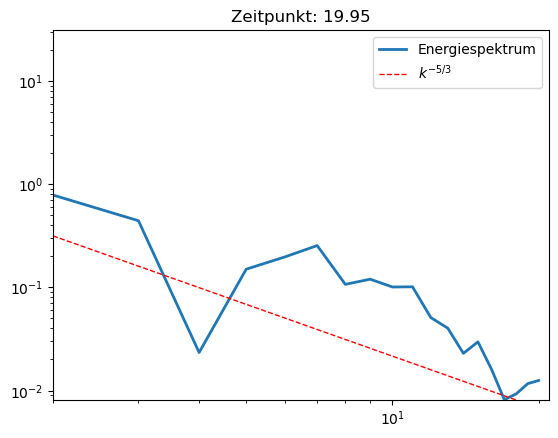

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Annahme: `energy_spectrum` und andere Variablen sind bereits definiert
energy_spectrum = np.array(simulation.reporters[3].out)

# Erstelle eine neue Figur und Achsen für die Animation
fig, ax = plt.subplots()

# Setze die Achsen auf logarithmische Skalen
ax.set_xscale('log')
ax.set_yscale('log')

# Bereich der x-Achse festlegen
ax.set_xlim(2, 21)  # Beispielbereich für Wellenlängen

# Erstelle das Anfangsplot und die Referenzlinie für k^-5/3
line, = ax.plot([], [], lw=2, label='Energiespektrum')
x_kolmogorov = np.linspace(2, 21, 100)  # Wellenzahlen für die Kolmogorov-Gerade
kolmogorov_line, = ax.plot(x_kolmogorov, x_kolmogorov**(-5/3), 'r--', lw=1, label=r'$k^{-5/3}$')  # Kolmogorov-Gerade

ax.legend()

# Initialisierungsfunktion: Zeichnet nur den Hintergrund des Plots
def init():
    line.set_data([], [])
    kolmogorov_line.set_data(x_kolmogorov, x_kolmogorov**(-5/3))  # Setze die Kolmogorov-Gerade
    return line, kolmogorov_line

# Animationsfunktion: Diese wird in jedem Frame aufgerufen
def animate(i):
    x = np.arange(2, 21)  # Korrigierte Wellenlängen (x-Achse)
    y = energy_spectrum[i, 4:23]  # Energiespektrum für die Zeit i
    line.set_data(x, y)
    ax.set_title(f'Zeitpunkt: {energy_spectrum[i, 1]:.2f}')  # Titel mit dem Zeitpunkt

    # Dynamische Anpassung der y-Achse
    y_min = np.min(y[y > 0])  # Ignoriere nicht-positive Werte
    y_max = np.max(energy_spectrum[:, 4:23])
    ax.set_ylim(y_min, y_max)  # Aktualisiere die y-Achse basierend auf dem aktuellen Min-Wert

    return line, kolmogorov_line

# Erstelle die Animation
ani = FuncAnimation(fig, animate, init_func=init, frames=energy_spectrum.shape[0], interval=100, blit=True)

# Speichern als GIF oder MP4 (optional)
ani.save('/home/ben/Schreibtisch/energy_spectrum_animation.gif', writer='imagemagick')
# ani.save('energy_spectrum_animation.mp4', writer='ffmpeg')

plt.show()

[0.00000000e+00 0.00000000e+00 3.91155481e-08]


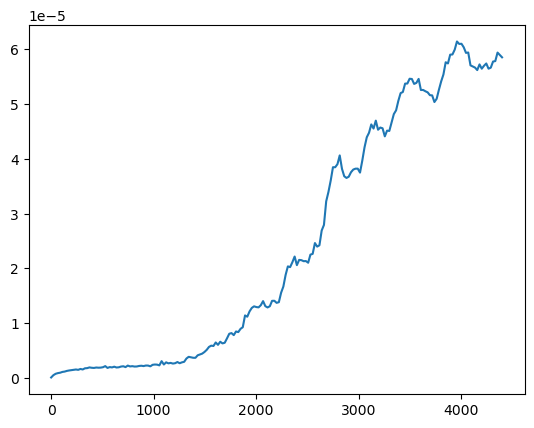

[0.00000000e+00 0.00000000e+00 3.91155481e-08]


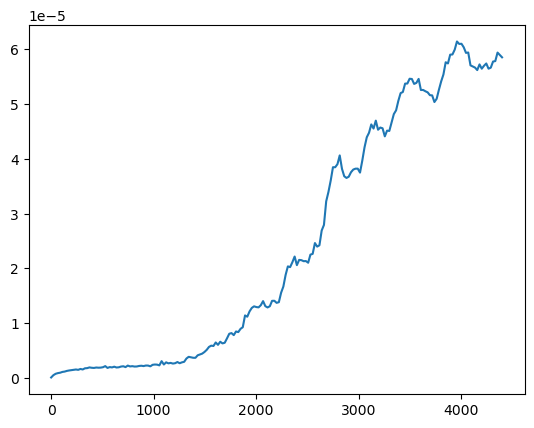

In [20]:
print(sym[0,:])
plt.plot(sym[:,0],sym[:,2])